In [1]:
#Importing all the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('complete_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099792
1,1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022198
2,2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817435
3,3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063892


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099792
1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022198
2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817435
3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063892


Creating 'Population' and 'Income' dataframe from the main dataframe

In [6]:
bangalore_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])

In [7]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [8]:
bangalore_population.to_csv('population_dataset.csv')

In [9]:
bangalore_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])

In [10]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [11]:
bangalore_income.to_csv('income_dataset.csv')

In [12]:
#calculating mean value of coordinates of Bangalore City through complete dataset dataframe
bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

Latitude and Longitude of Bangalore are :  12.962339620312497 77.60175294687502


In [13]:
CLIENT_ID = 'Your Client ID'
CLIENT_SECRET = 'Your Client Secret'
VERSION = '20180606'
LIMIT = 150

In [14]:
unique_boroughs_of_bangalore = df['Borough'].unique().tolist()

In [15]:
unique_boroughs_of_bangalore

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [16]:
borough_colors ={}
for i in unique_boroughs_of_bangalore:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [17]:
borough_colors

{'Central': '#791E5D',
 'Eastern': '#8C96F0',
 'NorthEastern': '#25AFE2',
 'Northern': '#A6ADDA',
 'SouthEastern': '#A12D1C',
 'Southern': '#50A2EE',
 'SouthernSuburbs': '#48DD1E',
 'Western': '#C90713'}

In [18]:
bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)

In [19]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)
    
bangalore_map

## Exploring bangalore Neighborhoods using FourSquare API

In [20]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)
 

In [21]:
bangalore_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [22]:
print("Total number of venues found in Bangalore are : ",bangalore_venues.shape[0])

Total number of venues found in Bangalore are :  596


In [23]:
bangalore_venues.head(5)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
2,Cantonment area,Central,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
3,Cantonment area,Central,12.972442,77.580643,Sapna Book House,12.976355,77.578461,Bookstore
4,Cantonment area,Central,12.972442,77.580643,Kamat Yatrinivas,12.975985,77.578125,Indian Restaurant


In [24]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       110
Café                     34
Bakery                   28
Fast Food Restaurant     27
Ice Cream Shop           21
Pizza Place              20
Department Store         18
Coffee Shop              15
Chinese Restaurant       15
Hotel                    11
Name: Neighborhood, dtype: int64

In [25]:
print("Total number of unique categories in bangalore are : ",len(bangalore_venues['Venue Category'].unique()))

Total number of unique categories in bangalore are :  125


### Getting number of venues per neighborhood

In [26]:
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [27]:
individual_bangalore_venue_count

Borough
Borough         Neighborhood                 
Central         Cantonment area             5
                Domlur                     13
                Indiranagar                67
                Jeevanbheemanagar           4
                Malleswaram                 6
                Pete area                   4
                Rajajinagar                12
                Sadashivanagar             19
                Seshadripuram               9
                Shivajinagar               12
                Ulsoor                      5
                Vasanth Nagar              25
Eastern         Bellandur                  28
                CV Raman Nagar              7
                Hoodi                       4
                Krishnarajapuram            1
                Mahadevapura                5
                Marathahalli                7
                Varthur                     1
                Whitefield                  9
NorthEastern    Banaswadi                   6
                HBR Layout                  4
                Horamavu                    3
                Kammanahalli               10
                Lingarajapuram              2
                Ramamurthy Nagar            8
Northern        Hebbal                      7
                Jalahalli                   3
                Mathikere                  13
                R. T. Nagar                 7
...                                       ...
                Yeshwanthpur                7
SouthEastern    BTM Layout                 32
                Bommanahalli                4
                Bommasandra                 1
                Electronic City             6
                HSR Layout                  9
                Koramangala                 6
                Madiwala                   28
Southern        Banashankari                7
                Basavanagudi                9
                Girinagar                   4
                J. P. Nagar                29
                Jayanagar                  13
                Kumaraswamy Layout          9
                Padmanabhanagar             4
                Uttarahalli                12
SouthernSuburbs Arekere                    25
                Begur                       5
                Gottigere                   8
                Hulimavu                    4
                Kothnur                     5
Western         Basaveshwaranagar          21
                Kamakshipalya               1
                Kengeri                     5
                Mahalakshmi Layout         11
                Nagarbhavi                  7
                Nandini Layout              1
                Nayandahalli                4
                Rajarajeshwari Nagar        6
                Vijayanagar                 3

[61 rows x 1 columns]

In [28]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [29]:
individual_bangalore_venue_count.reset_index(inplace=True)

In [30]:
individual_bangalore_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Central,Cantonment area,5
1,Central,Domlur,13
2,Central,Indiranagar,67
3,Central,Jeevanbheemanagar,4
4,Central,Malleswaram,6
5,Central,Pete area,4
6,Central,Rajajinagar,12
7,Central,Sadashivanagar,19
8,Central,Seshadripuram,9
9,Central,Shivajinagar,12


[Text(0, 0, 'Cantonment area'),
 Text(0, 0, 'Domlur'),
 Text(0, 0, 'Indiranagar'),
 Text(0, 0, 'Jeevanbheemanagar'),
 Text(0, 0, 'Malleswaram'),
 Text(0, 0, 'Pete area'),
 Text(0, 0, 'Rajajinagar'),
 Text(0, 0, 'Sadashivanagar'),
 Text(0, 0, 'Seshadripuram'),
 Text(0, 0, 'Shivajinagar'),
 Text(0, 0, 'Ulsoor'),
 Text(0, 0, 'Vasanth Nagar'),
 Text(0, 0, 'Bellandur'),
 Text(0, 0, 'CV Raman Nagar'),
 Text(0, 0, 'Hoodi'),
 Text(0, 0, 'Krishnarajapuram'),
 Text(0, 0, 'Mahadevapura'),
 Text(0, 0, 'Marathahalli'),
 Text(0, 0, 'Varthur'),
 Text(0, 0, 'Whitefield'),
 Text(0, 0, 'Banaswadi'),
 Text(0, 0, 'HBR Layout'),
 Text(0, 0, 'Horamavu'),
 Text(0, 0, 'Kammanahalli'),
 Text(0, 0, 'Lingarajapuram'),
 Text(0, 0, 'Ramamurthy Nagar'),
 Text(0, 0, 'Hebbal'),
 Text(0, 0, 'Jalahalli'),
 Text(0, 0, 'Mathikere'),
 Text(0, 0, 'R. T. Nagar'),
 Text(0, 0, 'Yelahanka'),
 Text(0, 0, 'Yeshwanthpur'),
 Text(0, 0, 'BTM Layout'),
 Text(0, 0, 'Bommanahalli'),
 Text(0, 0, 'Bommasandra'),
 Text(0, 0, 'Electronic 

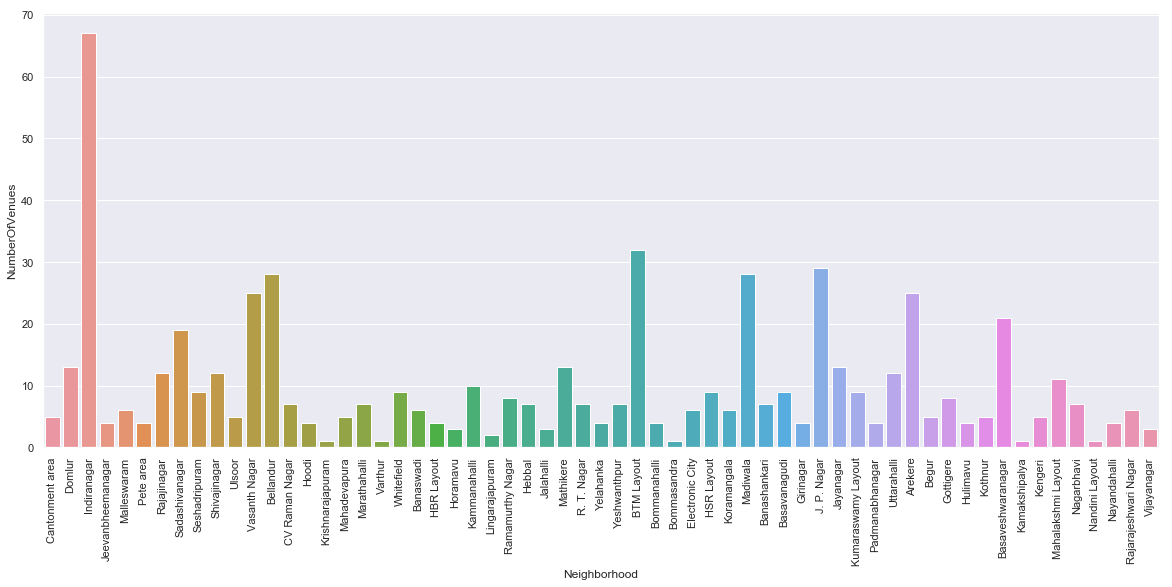

In [31]:
sns.set(rc={'figure.figsize':(20,8)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)
plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)

From the above graph we can see that Indiranagar has most number of venues followed by BTM Layout

In [32]:
bangalore_venues[bangalore_venues['Neighborhood']=='HSR Layout']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
360,HSR Layout,SouthEastern,12.9081,77.6476,Northam's Pizza Pita,12.908749,77.646835,Pizza Place
361,HSR Layout,SouthEastern,12.9081,77.6476,Art Blend Cafe,12.908901,77.647773,Café
362,HSR Layout,SouthEastern,12.9081,77.6476,Kapoor's Café,12.907857,77.651712,Punjabi Restaurant
363,HSR Layout,SouthEastern,12.9081,77.6476,Dragon's Kitchen,12.908938,77.644592,Chinese Restaurant
364,HSR Layout,SouthEastern,12.9081,77.6476,Fish & Fries,12.908522,77.651577,Fish & Chips Shop
365,HSR Layout,SouthEastern,12.9081,77.6476,Sri Udapi Upahara,12.910781,77.649152,Breakfast Spot
366,HSR Layout,SouthEastern,12.9081,77.6476,Mustard Food Court,12.910819,77.644376,Indian Restaurant
367,HSR Layout,SouthEastern,12.9081,77.6476,MK Ahmed Super Market,12.911994,77.648695,Department Store
368,HSR Layout,SouthEastern,12.9081,77.6476,Le Charcoal Express,12.911860,77.648352,Mediterranean Restaurant


### One hot encoding for allowing us to compare different venues based on some common scale

In [33]:
bangalore_venues_onehot = pd.get_dummies(bangalore_venues[['Venue Category']])

In [34]:
bangalore_venues_onehot

,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,Venue Category_Bar,...,Venue Category_Supermarket,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
bangalore_venues_onehot['Neighborhood'] = bangalore_venues['Neighborhood']
bangalore_venues_grouped = bangalore_venues_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Supermarket,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Arekere,0.000000,0.000000,0.00,0.000000,0.040000,0.000000,0.000000,0.04,0.040000,...,0.040,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00
1,BTM Layout,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.062500,...,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.062500,0.000000,0.000000,0.00
2,Banashankari,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00
3,Banaswadi,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.166667,...,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.166667,0.000000,0.000000,0.00
4,Basavanagudi,0.000000,0.000000,0.00,0.000000,0.111111,0.000000,0.000000,0.00,0.000000,...,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00
5,Basaveshwaranagar,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.047619,...,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00
6,Begur,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.200,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00
7,Bellandur,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.035714,...,0.000,0.035714,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00
8,Bommanahalli,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.250000,...,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00
9,Bommasandra,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00


In [36]:
number_of_top_venues = 5

In [37]:
for hood in bangalore_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = bangalore_venues_grouped[bangalore_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Arekere ---------
                                Venue  Frequency
0    Venue Category_Indian Restaurant       0.16
1  Venue Category_Sporting Goods Shop       0.16
2     Venue Category_Department Store       0.08
3       Venue Category_Ice Cream Shop       0.04
4       Venue Category_Breakfast Spot       0.04


--------- BTM Layout ---------
                               Venue  Frequency
0   Venue Category_Indian Restaurant       0.19
1      Venue Category_Ice Cream Shop       0.09
2  Venue Category_Chinese Restaurant       0.09
3         Venue Category_Snack Place       0.09
4         Venue Category_Pizza Place       0.06


--------- Banashankari ---------
                                    Venue  Frequency
0        Venue Category_Indian Restaurant       0.29
1                     Venue Category_Café       0.29
2  Venue Category_North Indian Restaurant       0.14
3           Venue Category_Clothing Store       0.14
4              Venue Category_Pizza Place       0.14


--

                                  Venue  Frequency
0   Venue Category_Fast Food Restaurant       0.50
1            Venue Category_Pizza Place       0.25
2     Venue Category_Chinese Restaurant       0.25
3                    Venue Category_ATM       0.00
4  Venue Category_Performing Arts Venue       0.00


--------- Kamakshipalya ---------
                                    Venue  Frequency
0  Venue Category_South Indian Restaurant        1.0
1            Venue Category_Metro Station        0.0
2                     Venue Category_Park        0.0
3          Venue Category_Paintball Field        0.0
4             Venue Category_Outlet Store        0.0


--------- Kammanahalli ---------
                                 Venue  Frequency
0  Venue Category_Fast Food Restaurant        0.2
1     Venue Category_Indian Restaurant        0.1
2           Venue Category_Snack Place        0.1
3      Venue Category_Department Store        0.1
4    Venue Category_Falafel Restaurant        0.1


---

                            Venue  Frequency
0      Venue Category_Supermarket        1.0
1              Venue Category_ATM        0.0
2    Venue Category_Metro Station        0.0
3             Venue Category_Park        0.0
4  Venue Category_Paintball Field        0.0


--------- Vasanth Nagar ---------
                               Venue  Frequency
0   Venue Category_Indian Restaurant       0.20
1         Venue Category_Coffee Shop       0.16
2  Venue Category_Italian Restaurant       0.08
3  Venue Category_Chinese Restaurant       0.08
4               Venue Category_Hotel       0.08


--------- Vijayanagar ---------
                                  Venue  Frequency
0                 Venue Category_Bakery       0.67
1      Venue Category_Indian Restaurant       0.33
2     Venue Category_Mexican Restaurant       0.00
3  Venue Category_Performing Arts Venue       0.00
4                   Venue Category_Park       0.00


--------- Whitefield ---------
                                 

In [38]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [39]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_venues_grouped['Neighborhood']

for ind in np.arange(bangalore_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Ice Cream Shop,Venue Category_Burger Joint,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Bus Line,Venue Category_Chinese Restaurant,Venue Category_Bar
1,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Chinese Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Sandwich Place,Venue Category_Electronics Store,Venue Category_Coffee Shop
2,Banashankari,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Pizza Place,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Yoga Studio,Venue Category_Falafel Restaurant,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant
3,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Café,Venue Category_Grocery Store,Venue Category_Yoga Studio,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant
4,Basavanagudi,Venue Category_Indian Restaurant,Venue Category_Metro Station,Venue Category_Hookah Bar,Venue Category_Athletics & Sports,Venue Category_Café,Venue Category_Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Food & Drink Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop


In [40]:
#rows and columns in the above dataframe
neighborhoods_venues_sorted.shape

(61, 11)

### Next we use the elbow method to find the optimal 'k' value for Clustering

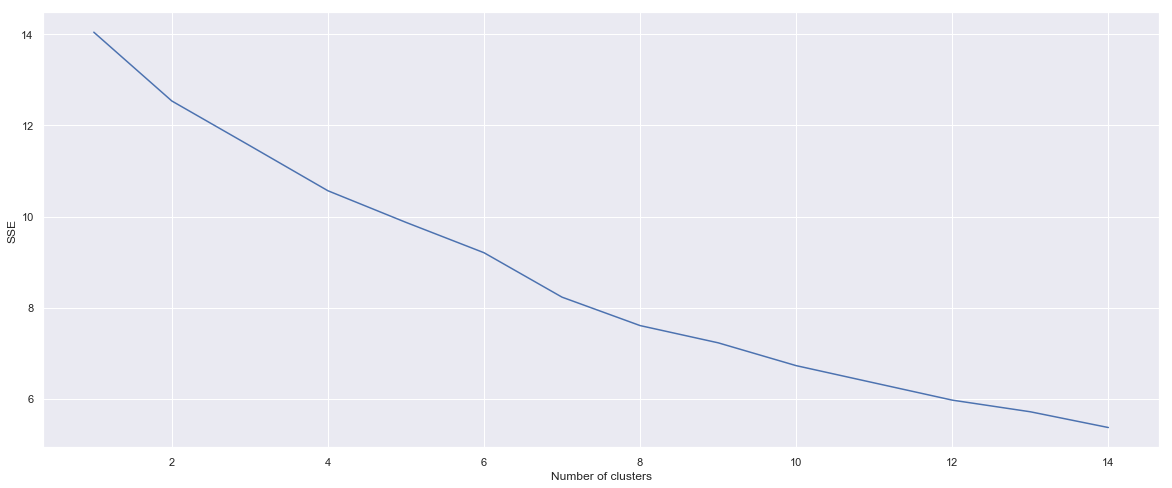

In [41]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))
    bangalore_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

#### From the above graph, we can see the optimal value for cluster is 4.

In [42]:
kmeans = KMeans(n_clusters=4,random_state=0)

In [43]:
kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [44]:
bangalore_venues_grouped['Cluster'] = kmeans.labels_

In [45]:
bangalore_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0    46
1     5
2     7
3     3
Name: Neighborhood, dtype: int64

In [46]:
bangalore_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Andhra Restaurant', 'Venue Category_Art Museum',
       'Venue Category_Asian Restaurant', 'Venue Category_Athletics & Sports',
       'Venue Category_Auto Garage', 'Venue Category_BBQ Joint',
       'Venue Category_Badminton Court', 'Venue Category_Bakery',
       ...
       'Venue Category_Tea Room', 'Venue Category_Tex-Mex Restaurant',
       'Venue Category_Toll Plaza', 'Venue Category_Train Station',
       'Venue Category_Udupi Restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Women's Store',
       'Venue Category_Yoga Studio', 'Cluster'],
      dtype='object', length=127)

In [47]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues_grouped,on='Neighborhood')

In [48]:
neighborhoods_venues_sorted.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Ice Cream Shop,Venue Category_Burger Joint,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Bus Line,Venue Category_Chinese Restaurant,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
1,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Chinese Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Sandwich Place,Venue Category_Electronics Store,...,0.0,0.0,0.0,0.0,0.0,0.062500,0.0,0.0,0.0,0
2,Banashankari,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Pizza Place,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Yoga Studio,Venue Category_Falafel Restaurant,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
3,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Café,Venue Category_Grocery Store,Venue Category_Yoga Studio,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,...,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0
4,Basavanagudi,Venue Category_Indian Restaurant,Venue Category_Metro Station,Venue Category_Hookah Bar,Venue Category_Athletics & Sports,Venue Category_Café,Venue Category_Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Food & Drink Shop,Venue Category_Flea Market,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0


In [49]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues,on='Neighborhood')

In [50]:
# create map using folium library
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)

In [51]:
# set color codes for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

### Recommending location based on user input

#### To recommend first we need to analyze factors such as population and income.

In [52]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [53]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [54]:
#finding normalized population
bangalore_population['Normalized_population'] = bangalore_population['Population']/bangalore_population['Population'].max(axis=0)
bangalore_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Central,Cantonment area,866377,0.880810
1,Central,Domlur,743186,0.755567
2,Central,Indiranagar,474289,0.482190
3,Central,Jeevanbheemanagar,527874,0.536668
4,Central,Malleswaram,893629,0.908516


In [55]:
#finding normalized income
bangalore_income['Normalized_income'] = bangalore_income['AverageIncome']/bangalore_income['AverageIncome'].max(axis=0)
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,Central,Cantonment area,18944.099792,0.293051
1,Central,Domlur,56837.022198,0.879225
2,Central,Indiranagar,41991.817435,0.649581
3,Central,Jeevanbheemanagar,6667.447632,0.103140
4,Central,Malleswaram,53270.063892,0.824047


In [56]:
bangalore_venues_grouped.head(5)

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Arekere,0.0,0.0,0.0,0.0,0.040000,0.0,0.0,0.04,0.040000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
1,BTM Layout,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.062500,...,0.0,0.0,0.0,0.0,0.0,0.062500,0.0,0.0,0.0,0
2,Banashankari,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
3,Banaswadi,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0
4,Basavanagudi,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0


### Recommending Vegeterian Restaurants

In [57]:
bangalore_north_indian = bangalore_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_north_indian.head()

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Supermarket,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Arekere,0,0,0,0,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
1,BTM Layout,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,2,0,0,0
2,Banashankari,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Banaswadi,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,Basavanagudi,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
bangalore_north_indian['Venue Category_North Indian Restaurant']

0     0
1     0
2     1
3     0
4     0
5     0
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    1
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
     ..
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
Name: Venue Category_North Indian Restaurant, Length: 61, dtype: uint8

In [59]:
bangalore_north_indian = bangalore_north_indian[['Neighborhood','Venue Category_North Indian Restaurant']]

In [60]:
bangalore_north_indian.rename(columns={'Venue Category_North Indian Restaurant':'NumberOfNorthIndianRestaurants'},inplace=True)

In [61]:
bangalore_north_indian.head()

,Neighborhood,NumberOfNorthIndianRestaurants
0,Arekere,0
1,BTM Layout,0
2,Banashankari,1
3,Banaswadi,0
4,Basavanagudi,0


In [62]:
bangalore_north_indian['NumberOfNonNorthIndianRestaurants'] = 1-(bangalore_north_indian['NumberOfNorthIndianRestaurants']/bangalore_north_indian['NumberOfNorthIndianRestaurants'].max(axis=0))
bangalore_north_indian.head()

,Neighborhood,NumberOfNorthIndianRestaurants,NumberOfNonNorthIndianRestaurants
0,Arekere,0,1.0
1,BTM Layout,0,1.0
2,Banashankari,1,0.0
3,Banaswadi,0,1.0
4,Basavanagudi,0,1.0


In [63]:
bangalore_north_indian.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)
bangalore_north_indian.head()

,Neighborhoods,NumberOfNorthIndianRestaurants,NumberOfNonNorthIndianRestaurants
0,Arekere,0,1.0
1,BTM Layout,0,1.0
2,Banashankari,1,0.0
3,Banaswadi,0,1.0
4,Basavanagudi,0,1.0


### Building a target neighborhood (assume - HSR Layout) by providing a sample restaurant.

In [64]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='HSR Layout']

In [65]:
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,185,HSR Layout,Venue Category_Mediterranean Restaurant,Venue Category_Breakfast Spot,Venue Category_Pizza Place,Venue Category_Punjabi Restaurant,Venue Category_Chinese Restaurant,Venue Category_Café,Venue Category_Fish & Chips Shop,Venue Category_Department Store,...,0.0,0.0,0,SouthEastern,12.9081,77.6476,Northam's Pizza Pita,12.908749,77.646835,Pizza Place
1,186,HSR Layout,Venue Category_Mediterranean Restaurant,Venue Category_Breakfast Spot,Venue Category_Pizza Place,Venue Category_Punjabi Restaurant,Venue Category_Chinese Restaurant,Venue Category_Café,Venue Category_Fish & Chips Shop,Venue Category_Department Store,...,0.0,0.0,0,SouthEastern,12.9081,77.6476,Art Blend Cafe,12.908901,77.647773,Café
2,187,HSR Layout,Venue Category_Mediterranean Restaurant,Venue Category_Breakfast Spot,Venue Category_Pizza Place,Venue Category_Punjabi Restaurant,Venue Category_Chinese Restaurant,Venue Category_Café,Venue Category_Fish & Chips Shop,Venue Category_Department Store,...,0.0,0.0,0,SouthEastern,12.9081,77.6476,Kapoor's Café,12.907857,77.651712,Punjabi Restaurant
3,188,HSR Layout,Venue Category_Mediterranean Restaurant,Venue Category_Breakfast Spot,Venue Category_Pizza Place,Venue Category_Punjabi Restaurant,Venue Category_Chinese Restaurant,Venue Category_Café,Venue Category_Fish & Chips Shop,Venue Category_Department Store,...,0.0,0.0,0,SouthEastern,12.9081,77.6476,Dragon's Kitchen,12.908938,77.644592,Chinese Restaurant
4,189,HSR Layout,Venue Category_Mediterranean Restaurant,Venue Category_Breakfast Spot,Venue Category_Pizza Place,Venue Category_Punjabi Restaurant,Venue Category_Chinese Restaurant,Venue Category_Café,Venue Category_Fish & Chips Shop,Venue Category_Department Store,...,0.0,0.0,0,SouthEastern,12.9081,77.6476,Fish & Fries,12.908522,77.651577,Fish & Chips Shop
5,190,HSR Layout,Venue Category_Mediterranean Restaurant,Venue Category_Breakfast Spot,Venue Category_Pizza Place,Venue Category_Punjabi Restaurant,Venue Category_Chinese Restaurant,Venue Category_Café,Venue Category_Fish & Chips Shop,Venue Category_Department Store,...,0.0,0.0,0,SouthEastern,12.9081,77.6476,Sri Udapi Upahara,12.910781,77.649152,Breakfast Spot
6,191,HSR Layout,Venue Category_Mediterranean Restaurant,Venue Category_Breakfast Spot,Venue Category_Pizza Place,Venue Category_Punjabi Restaurant,Venue Category_Chinese Restaurant,Venue Category_Café,Venue Category_Fish & Chips Shop,Venue Category_Department Store,...,0.0,0.0,0,SouthEastern,12.9081,77.6476,Mustard Food Court,12.910819,77.644376,Indian Restaurant
7,192,HSR Layout,Venue Category_Mediterranean Restaurant,Venue Category_Breakfast Spot,Venue Category_Pizza Place,Venue Category_Punjabi Restaurant,Venue Category_Chinese Restaurant,Venue Category_Café,Venue Category_Fish & Chips Shop,Venue Category_Department Store,...,0.0,0.0,0,SouthEastern,12.9081,77.6476,MK Ahmed Super Market,12.911994,77.648695,Department Store
8,193,HSR Layout,Venue Category_Mediterranean Restaurant,Venue Category_Breakfast Spot,Venue Category_Pizza Place,Venue Category_Punjabi Restaurant,Venue Category_Chinese Restaurant,Venue Category_Café,Venue Category_Fish & Chips Shop,Venue Category_Department Store,...,0.0,0.0,0,SouthEastern,12.9081,77.6476,Le Charcoal Express,12.911860,77.648352,Mediterranean Restaurant


In [66]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

In [67]:
target_cluster

0

In [68]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Ice Cream Shop,Venue Category_Burger Joint,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Bus Line,Venue Category_Chinese Restaurant,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Decathlon Sports India Pvt Ltd,12.887513,77.597712,Sporting Goods Shop
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Ice Cream Shop,Venue Category_Burger Joint,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Bus Line,Venue Category_Chinese Restaurant,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Pizza Hut,12.889420,77.597494,Pizza Place
2,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Ice Cream Shop,Venue Category_Burger Joint,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Bus Line,Venue Category_Chinese Restaurant,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Zhangs Dynasty,12.889923,77.597804,Chinese Restaurant
3,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Ice Cream Shop,Venue Category_Burger Joint,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Bus Line,Venue Category_Chinese Restaurant,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Guru Garden,12.891196,77.597979,Indian Restaurant
4,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Ice Cream Shop,Venue Category_Burger Joint,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Bus Line,Venue Category_Chinese Restaurant,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Kababis,12.889605,77.597557,Indian Restaurant


In [69]:
print("There are {} neighborhoods which has similar characteristics to HSR Layout.".format(possible_neighborhoods.shape[0]))

There are 540 neighborhoods which has similar characteristics to HSR Layout.


In [70]:
possible_neighborhoods.reset_index().head()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Ice Cream Shop,Venue Category_Burger Joint,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Bus Line,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Decathlon Sports India Pvt Ltd,12.887513,77.597712,Sporting Goods Shop
1,1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Ice Cream Shop,Venue Category_Burger Joint,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Bus Line,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Pizza Hut,12.889420,77.597494,Pizza Place
2,2,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Ice Cream Shop,Venue Category_Burger Joint,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Bus Line,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Zhangs Dynasty,12.889923,77.597804,Chinese Restaurant
3,3,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Ice Cream Shop,Venue Category_Burger Joint,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Bus Line,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Guru Garden,12.891196,77.597979,Indian Restaurant
4,4,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Ice Cream Shop,Venue Category_Burger Joint,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Bus Line,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Kababis,12.889605,77.597557,Indian Restaurant


In [71]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

C:\Users\Sahil\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


### Now we create ranking by combining population and income factors

In [72]:
possible_neighborhoods = possible_neighborhoods.merge(bangalore_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_north_indian[['Neighborhoods','NumberOfNorthIndianRestaurants','NumberOfNonNorthIndianRestaurants']],on='Neighborhoods')

In [73]:
possible_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfNorthIndianRestaurants,NumberOfNonNorthIndianRestaurants
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Ice Cream Shop,Venue Category_Burger Joint,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Bus Line,Venue Category_Chinese Restaurant,...,Decathlon Sports India Pvt Ltd,12.887513,77.597712,Sporting Goods Shop,138760,0.141072,29378.716626,0.454466,0,1.0
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Ice Cream Shop,Venue Category_Burger Joint,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Bus Line,Venue Category_Chinese Restaurant,...,Pizza Hut,12.889420,77.597494,Pizza Place,138760,0.141072,29378.716626,0.454466,0,1.0
2,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Ice Cream Shop,Venue Category_Burger Joint,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Bus Line,Venue Category_Chinese Restaurant,...,Zhangs Dynasty,12.889923,77.597804,Chinese Restaurant,138760,0.141072,29378.716626,0.454466,0,1.0
3,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Ice Cream Shop,Venue Category_Burger Joint,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Bus Line,Venue Category_Chinese Restaurant,...,Guru Garden,12.891196,77.597979,Indian Restaurant,138760,0.141072,29378.716626,0.454466,0,1.0
4,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Ice Cream Shop,Venue Category_Burger Joint,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_Bus Line,Venue Category_Chinese Restaurant,...,Kababis,12.889605,77.597557,Indian Restaurant,138760,0.141072,29378.716626,0.454466,0,1.0


In [74]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonNorthIndianRestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)
recommended_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfNorthIndianRestaurants,NumberOfNonNorthIndianRestaurants,Ranking
0,Rajajinagar,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Breakfast Spot,Venue Category_Pharmacy,Venue Category_Snack Place,Venue Category_Café,Venue Category_Fast Food Restaurant,...,12.987138,77.549514,Indian Restaurant,981362,0.99771,60967.535874,0.943121,0,1.0,0.928947
1,Rajajinagar,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Breakfast Spot,Venue Category_Pharmacy,Venue Category_Snack Place,Venue Category_Café,Venue Category_Fast Food Restaurant,...,12.987669,77.549978,Bakery,981362,0.99771,60967.535874,0.943121,0,1.0,0.928947
2,Rajajinagar,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Breakfast Spot,Venue Category_Pharmacy,Venue Category_Snack Place,Venue Category_Café,Venue Category_Fast Food Restaurant,...,12.987441,77.549826,Bakery,981362,0.99771,60967.535874,0.943121,0,1.0,0.928947
3,Rajajinagar,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Breakfast Spot,Venue Category_Pharmacy,Venue Category_Snack Place,Venue Category_Café,Venue Category_Fast Food Restaurant,...,12.992473,77.550173,Park,981362,0.99771,60967.535874,0.943121,0,1.0,0.928947
4,Rajajinagar,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Breakfast Spot,Venue Category_Pharmacy,Venue Category_Snack Place,Venue Category_Café,Venue Category_Fast Food Restaurant,...,12.987868,77.549916,Café,981362,0.99771,60967.535874,0.943121,0,1.0,0.928947


In [75]:
t3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [76]:
t3_df = pd.DataFrame(t3).reset_index()
t3_df.head(3)

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,[0.32959888840700646]
1,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,[0.7918117751640322]
2,Banashankari,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Pizza Place,[0.7234029969357849]


#### From the above results it can be seen that the neighborhoods 'Arekere, BTM Layout & Banashankari' are the 'Three most common Venues' to find food similar to HSR Layout's North Indian Restaurants.